# Installing Whisper

The commands below will install the Python packages for this demo.

In [4]:
from IPython import display as ipd

In [7]:
! pip install git+https://github.com/akashmjn/tinydiarize.git
! pip install yt-dlp
! apt install ffmpeg

ipd.clear_output()

In [8]:
import whisper  # repo is installed with the same name as original repo (for now)

# Fetching from YouTube for demo

You can try it on any english video by replacing `yt_url` below. (*See notes at the end as it still has some rough edges.*)

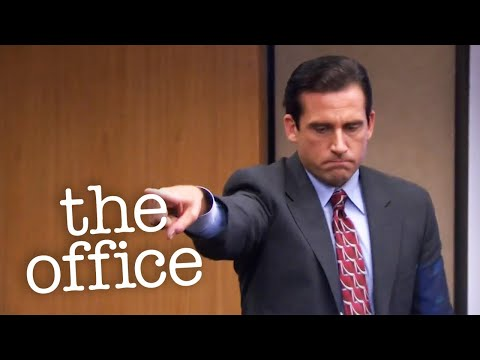

In [9]:
yt_url = "https://www.youtube.com/watch?v=xTQ7vhtp23w"  # great clip from the office
# yt_url = "https://www.youtube.com/watch?v=I2ZK3ngNvvI"    # lex/karpathy clip

! yt-dlp -f mp4 {yt_url} -o demo_video.mp4

video_id = yt_url.split("?v=")[-1]
ipd.YouTubeVideo(video_id)  # render embedded video

# Transcribing with speaker turns



In [9]:
model = whisper.load_model("small.en-tdrz")
result = whisper.transcribe(model, "demo_video.mp4", verbose=True, condition_on_previous_text=False)
# time segments are a bit more stable without prev_text conditioning as it wasn't yet finetuned that way

In [15]:
# start/end times clip the famous section of the office clip (edit to your liking)
v_start, v_end = "00:02:41", "00:03:29"

# write to subtitles file and burn into video
writer = whisper.utils.get_writer("srt", ".")
writer(result, "demo_video.mp4")

# burn subtitles into video clip
!ffmpeg -i demo_video.mp4 -ss {v_start} -to {v_end} -vf subtitles=demo_video.srt -y demo_video-clip.mp4

# burn subtitles into whole video
# !ffmpeg -i demo_video.mp4 -vf subtitles=demo_video.srt -y demo_video-subburn.mp4

ipd.clear_output()

In [ ]:
# render the video with generated transcript
ipd.Video("demo_video-clip.mp4", embed=True)

# Performance notes

As the current `small.en-tdrz` checkpoint is still an early prototype, these are some known rough edges:
- Speaker turns are predicted with near-perfect precision, but lower recall.
- Timestamp behavior is very different, and there can tend to be quite long time segments.
- WER appears fairly similar to the original `small.en`, however hasn't been as extensively tested.
- I noticed an odd tendency to occasionally delete a primary speakers sentences (e.g. Lex's sentences in the Lex/Karpathy clip).

I suspect many these are due to quirks of the finetuning data/setup and will progressively improve as finetuning evolves. See `/tdrz_dev` on the repo for a more detailed look at performance.